In [1]:
import pyemma
pyemma.__version__

'2.5.7'

In [2]:
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
matplotlib.rcParams.update({'font.size': 12})

In [3]:
import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt

In [4]:
import warnings
def plot_sampled_function(xall, yall, zall, ax=None, nbins=100, nlevels=20, cmap=plt.cm.bwr, cbar=True, cbar_label=None):
    # histogram data
    xmin = np.min(xall)
    xmax = np.max(xall)
    dx = (xmax - xmin) / float(nbins)
    ymin = np.min(yall)
    ymax = np.max(yall)
    dy = (ymax - ymin) / float(nbins)
    # bin data
    eps = x
    xbins = np.linspace(xmin - 0.5*dx, xmax + 0.5*dx, num=nbins)
    ybins = np.linspace(ymin - 0.5*dy, ymax + 0.5*dy, num=nbins)
    xI = np.digitize(xall, xbins)
    yI = np.digitize(yall, ybins)
    # result
    z = np.zeros((nbins, nbins))
    N = np.zeros((nbins, nbins))
    # average over bins
    for t in range(len(xall)):
        z[xI[t], yI[t]] += zall[t]
        N[xI[t], yI[t]] += 1.0
    
    with warnings.catch_warnings() as cm:
        warnings.simplefilter('ignore')
        z /= N
    # do a contour plot
    extent = [xmin, xmax, ymin, ymax]
    if ax is None:
        ax = plt.gca()
    ax.contourf(z.T, 100, extent=extent, cmap=cmap)
    if cbar:
        cbar = plt.colorbar()
        if cbar_label is not None:
            cbar.ax.set_ylabel(cbar_label)
            
    return ax

In [5]:
def plot_sampled_density(xall, yall, zall, ax=None, nbins=100, cmap=plt.cm.Blues, cbar=True, cbar_label=None):
    return plot_sampled_function(xall, yall, zall, ax=ax, nbins=nbins, cmap=cmap, cbar=cbar, cbar_label=cbar_label)

In [6]:
key_residue=[i for i in range(61, 73)] + \
            [i for i in range(91,115)] + \
            [i for i in range(127,139)] + \
            [i for i in range(160,199)] + \
            [i for i in range(223,229)] + \
            [i for i in range(256,271)] + \
            [i for i in range(413,440)] + \
            [i for i in range(448,469)]

In [7]:
len(key_residue)

156

In [8]:
key_residue[:5]

[61, 62, 63, 64, 65]

### Add feature

In [9]:
topfile='../01_fix-MD/1_MHETase-md_nowat.gro'
feat = coor.featurizer(topfile)
#ref='../01_fix-MD/01_MHETase-md_nowat.xtc'
#for ri in key_reside:
#    feat.add_backbone_torsions(selstr='residue %i'%ri, cossin=True)
#for ri in range(2,317):
#    feat.add_backbone_torsions(selstr='residue %i and backbone' %ri, cossin=True, periodic=True)
for ri in key_residue:
        feat.add_backbone_torsions(selstr=f'residue {ri}', cossin=False)
#feat.add_residue_mindist(residue_pairs=ind_arr, scheme='closest-heavy',threshold=1, periodic=True)
#feat.add_angles(ang_pair, deg=False, cossin=True, periodic=True)
#feat.add_sidechain_torsions('resid 372', deg=True, cossin=True, which='all')
#feat.add_distances(dis_pair, periodic=True)
#feat.add_contacts(indices=_VR6_atom, indices2=cata_center_atom, threshold=0.3, periodic=True)
#feat.add_backbone_torsions(selstr=, deg=True, cossin=True, periodic=True)
#feat.add_residue_COM(range(317))
#feat.add_minrmsd_to_ref(ref, ref_frame=0, atom_indices=None, precentered=False)
#feat.add_group_mindist(group_definitions=groups, group_pairs=groups_pairs, periodic=True)


In [10]:
feat.describe()[:10]

['PHI 0 MET 61',
 'PSI 0 MET 61',
 'PHI 0 VAL 62',
 'PSI 0 VAL 62',
 'PHI 0 TRP 63',
 'PSI 0 TRP 63',
 'PHI 0 PRO 64',
 'PSI 0 PRO 64',
 'PHI 0 ASN 65',
 'PSI 0 ASN 65']

In [11]:
from glob import glob
traj_list = glob('../01_fix-MD//*nowat.xtc')
len(traj_list)

60

In [12]:
traj_list[0:2] #warning need to be sorted

['../01_fix-MD/10_MHETase-md_nowat.xtc',
 '../01_fix-MD/11_MHETase-md_nowat.xtc']

In [13]:
inp = coor.source(traj_list, feat)
inp.dimension()

312

In [14]:
tica_obj = coor.tica(inp, lag=25, dim=3, kinetic_map=True)

In [15]:
tica_obj.dimension()

3

In [16]:
tica_obj.cumvar[:10]

array([0.02199601, 0.04387362, 0.06539144, 0.08680047, 0.10765193,
       0.12819209, 0.14852099, 0.16860441, 0.18831919, 0.20771951])

In [17]:
# here we do a little trick to ensure that eigenvectors always have the same sign structure. 
# That's irrelevant to the analysis and just nicer plots - you can ignore it.
for i in range(2):
    if tica_obj.eigenvectors[0, i] > 0: 
        tica_obj.eigenvectors[:, i] *= -1
     

In [18]:
Y = tica_obj.get_output() # get tica coordinates

In [19]:
#np.save('tica_obj_output.npy',Y)

In [20]:
#Y = np.load('tica_obj_output.npy', allow_pickle=True)

In [21]:
#plt.style.use('chenlin')

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcc409070b8>)

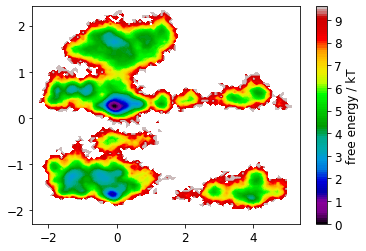

In [22]:
mplt.plot_free_energy(np.vstack(Y)[:, 2], np.vstack(Y)[:, 1])

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcc30df7198>)

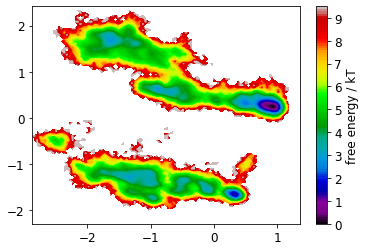

In [23]:
mplt.plot_free_energy(np.vstack(Y)[:, 0], np.vstack(Y)[:, 1])

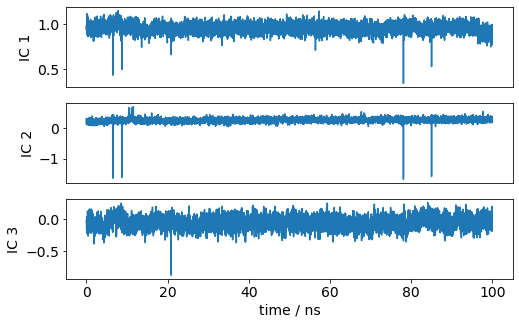

In [24]:
matplotlib.rcParams.update({'font.size': 14})
dt = 0.01
plt.figure(figsize=(8,5))
ax1=plt.subplot(311)
x = dt*np.arange(Y[0].shape[0])
plt.plot(x, Y[0][:,0]); plt.ylabel('IC 1'); plt.xticks([]); 
ax1=plt.subplot(312)
plt.plot(x, Y[0][:,1]); plt.ylabel('IC 2'); plt.xticks([]);  
ax1=plt.subplot(313)
plt.plot(x, Y[0][:,2]); plt.xlabel('time / ns'); plt.ylabel('IC 3'); 

In [25]:
n_clusters =100
clustering = coor.cluster_kmeans(Y,k=n_clusters, max_iter=100, fixed_seed=True)

In [26]:
dtrajs = clustering.dtrajs

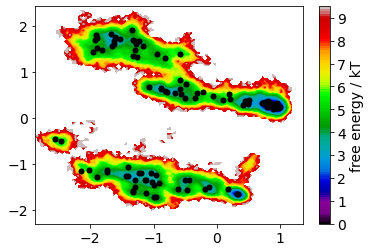

In [27]:
mplt.plot_free_energy(np.vstack(Y)[:,0], np.vstack(Y)[:,1])
cc_x = clustering.clustercenters[:,0]
cc_y = clustering.clustercenters[:,1]
plt.plot(cc_x,cc_y, linewidth=0, marker='o', markersize=5, color='black')

In [28]:
its = msm.timescales_msm(dtrajs, lags=100, nits=4, errors='bayes', n_jobs=-1)

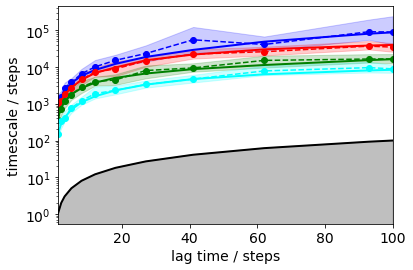

In [29]:
matplotlib.rcParams.update({'font.size': 14})
mplt.plot_implied_timescales(its, units='steps', linewidth=2)


In [30]:
msm_lag = 20
M = msm.estimate_markov_model(dtrajs, msm_lag)
print('fraction of states used = ', M.active_state_fraction)
print('fraction of counts used = ', M.active_count_fraction)

fraction of states used =  1.0
fraction of counts used =  1.0


In [31]:

ck = M.cktest(4, mlags=10, err_est=False,)

(<Figure size 504x504 with 16 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc218e18d0>,
       dtype=object))

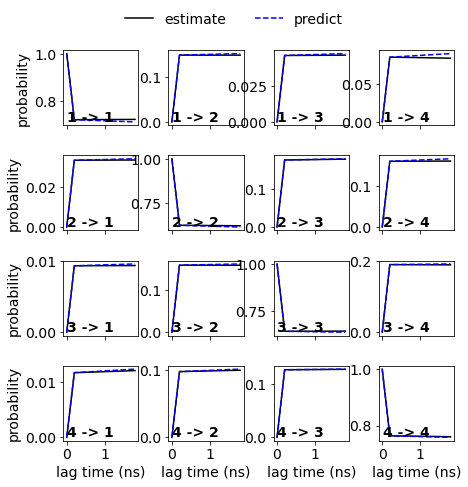

In [32]:
matplotlib.rcParams.update({'font.size': 14})
mplt.plot_cktest(ck, diag=False, figsize=(7,7),layout=(1.5,1.5), padding_top=0.1, y01=False, padding_between=0.4, dt=0.01, units='ns')

In [33]:
M.active_set

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [34]:
M.transition_matrix.shape


(100, 100)

In [35]:
# ... therefore we take the statistical weight of each simulation timestep (also available from the MSM object)
# and use that to create a contour plot
xall = np.vstack(Y)[:,0]
yall = np.vstack(Y)[:,1]
W = np.concatenate(M.trajectory_weights())

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcc1074def0>)

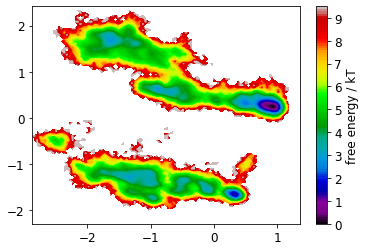

In [36]:
# TODO: make this an MSM-weighted free energy plot
matplotlib.rcParams.update({'font.size': 12})
mplt.plot_free_energy(xall, yall)


Text(0, 0.5, '${\\lambda}$')

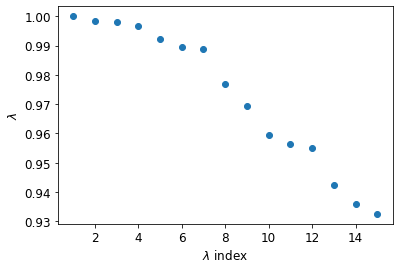

In [37]:
M.eigenvalues()
plt.plot(range(1,16),M.eigenvalues()[:15],lw=0, marker='o')
#plt.xticks(range(1,16))
plt.xlabel('${\lambda}$ index')
plt.ylabel('${\lambda}$')
#plt.savefig('./figs/eigenvalues.png',dpi=600)

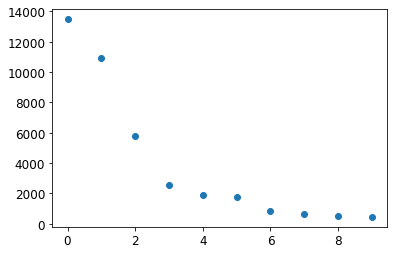

In [38]:
plt.plot(M.timescales()[0:10],lw=0,marker='o')

In [39]:
M.timescales()[:10]*msm_lag*0.01

array([2694.87404385, 2187.51150625, 1160.92240072,  506.92322139,
        385.21567603,  356.46193229,  170.50862655,  129.18312166,
         96.91883419,   89.96231454])

In [40]:
for i in M.eigenvalues()[1:15]:
    print(msm_lag/-np.log(i)*msm_lag*0.01)

2694.87404385324
2187.5115062482505
1160.9224007150958
506.92322139043375
385.21567602625646
356.46193229203294
170.50862654991553
129.18312166232835
96.91883419157213
89.96231454381086
87.21392864947845
67.48352801627526
60.3327711929179
57.275104000627366


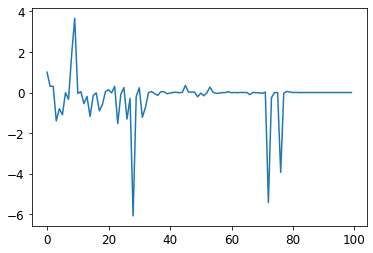

In [41]:
plt.plot(M.eigenvectors_right()[1])

In [42]:
n_sets = 7
M_P = M.pcca(n_sets)
pcca_dist = M.metastable_distributions
membership = M.metastable_memberships  # get PCCA memberships
# memberships over trajectory
dist_all = [np.hstack([pcca_dist[i,:][dtraj] for dtraj in M.discrete_trajectories_active]) for i in range(n_sets)]
mem_all = [np.hstack([membership[:,i][dtraj] for dtraj in M.discrete_trajectories_active]) for i in range(n_sets)]

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcb0057b630>)

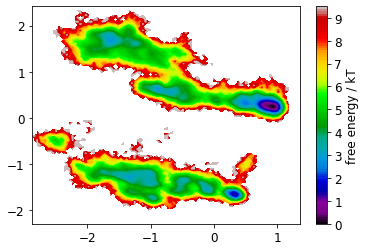

In [43]:
# TODO: make this an MSM-weighted free energy plot
matplotlib.rcParams.update({'font.size': 12})
mplt.plot_free_energy(xall, yall)


In [44]:
def my_sampled_function(xall, yall, zall, ax=None, nbins=100, nlevels=20, cmap=plt.cm.bwr, cbar=True, cbar_label=None):
    # histogram data
    xmin = np.min(xall)
    xmax = np.max(xall)
    dx = (xmax - xmin) / float(nbins)
    ymin = np.min(yall)
    ymax = np.max(yall)
    dy = (ymax - ymin) / float(nbins)
    # bin data
    eps = x
    xbins = np.linspace(xmin - 0.5*dx, xmax + 0.5*dx, num=nbins)
    ybins = np.linspace(ymin - 0.5*dy, ymax + 0.5*dy, num=nbins)
    xI = np.digitize(xall, xbins)
    yI = np.digitize(yall, ybins)
    # result
    z = np.zeros((nbins, nbins))
    N = np.zeros((nbins, nbins))
    # average over bins
    for t in range(len(xall)):
        z[xI[t], yI[t]] += zall[t]
        N[xI[t], yI[t]] += 1.0
    
    with warnings.catch_warnings() as cm:
        warnings.simplefilter('ignore')
        z /= N
    # do a contour plot
    extent = [xmin, xmax, ymin, ymax]
    if ax is None:
        ax = plt.gca()
    
    step = 0.02
    m = np.nanmax(z)
    levels = np.arange(0.0, m, step) + step
    
    ax.contourf(z.T, levels, cmap=cmap, extent=extent)
   # if cbar:
     #   cbar = plt.colorbar()
      #  if cbar_label is not None:
      #      cbar.ax.set_ylabel(cbar_label)
            
    return ax

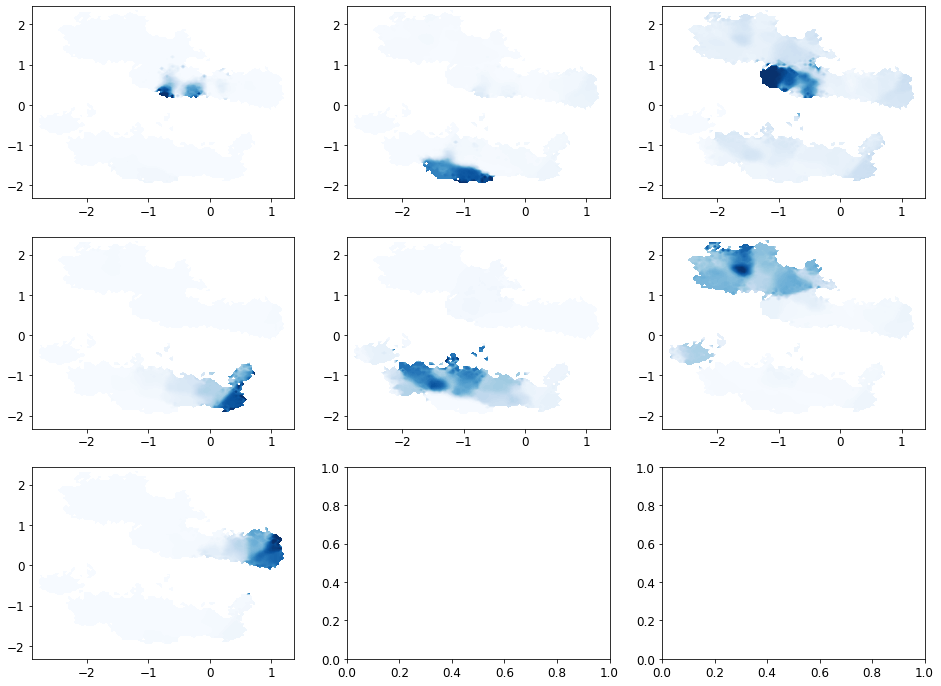

In [46]:
fig, axes = plt.subplots(3, 3, figsize=(16,12))
matplotlib.rcParams.update({'font.size': 12})
axes = axes.flatten()
#maps = [plt.cm.Blues, plt.cm.Blues,plt.cm.Blues,plt.cm.Blues,plt.cm.Blues,plt.cm.Blues]
np.seterr(invalid='warn') 
for k in range(n_sets):
        plot_sampled_density(xall, yall, dist_all[k], ax=axes[k], cmap=plt.cm.Blues, cbar=False)

In [47]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors

In [51]:
new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']
def get_cm(color_i):
    my_colors = [colors.to_rgb(color_i), colors.to_rgb(color_i)]  # R -> G -> B
    cmap_name = 'my_list'
    cm = LinearSegmentedColormap.from_list(cmap_name, my_colors, N=100)
    return cm

In [52]:
def set_tick(ax,line_width=2.5,tick_width=1.5,tick_length=7,dt_right=0,dt_top=0,dt_bottom=0):    ###修改:默认设定值
    ax.spines['left'].set_linewidth(line_width)
    ax.spines['right'].set_linewidth(line_width-dt_right)
    ax.spines['top'].set_linewidth(line_width-dt_top)
    ax.spines['bottom'].set_linewidth(line_width-dt_bottom)
    ax.tick_params(which='major',width=tick_width,length=tick_length,direction='in',labelsize=20)         
    ax.tick_params(which='minor',width=tick_width/2,length=tick_length/2,direction='in')
    ax.tick_params(top=True,right=True)                            
    #ax.set_ylim(-0.06,0.375)
    return ax 

Text(0, 0.5, 'IC 2')

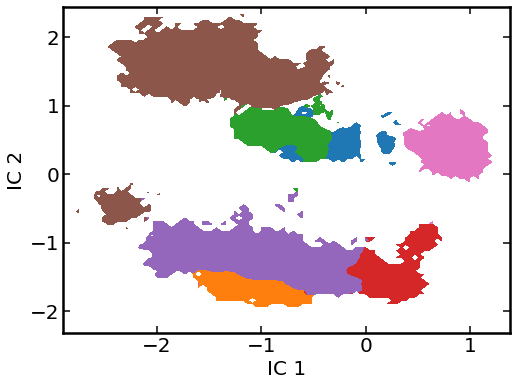

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
matplotlib.rcParams.update({'font.size': 12})
axes = axes.flatten()
new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']
np.seterr(invalid='warn') 
for k in range(n_sets):
    cm = get_cm(new_colors[k])
    ax = my_sampled_function(xall, yall, dist_all[k], ax=ax, cmap=cm, cbar=False)
set_tick(ax)
ax.set_xlabel('IC 1',fontsize=20)
ax.set_ylabel('IC 2',fontsize=20)

In [143]:
fig.savefig('PCCA_sampling.png',dpi=300)

In [201]:
np.shape(M.metastable_memberships)

(100, 7)

In [202]:
pcca_samples = M.sample_by_distributions(pcca_dist, 2000)

In [226]:
%mkdir pcca_frame_index

In [227]:
for i,pcca_i in enumerate(pcca_samples):
    df = pd.DataFrame(pcca_i)
    df.to_csv(f'./pcca_frame_index/pcca_{i+1}_frame_index.csv',index=False,header=False)

In [213]:
df = pd.DataFrame(pcca_samples[0],columns=['traj_index','frame_index'])

In [223]:
df

,0,1
0,14,856
1,59,6744
2,6,7814
3,0,8181
4,2,2819
...,...,...
1995,0,6514
1996,57,1742
1997,48,14479
1998,15,173


In [203]:
mkdir data

mkdir: data: File exists


In [204]:
outfiles = []
for i in range(n_sets):
    outfiles.append('./data/pcca{}.xtc'.format(i+1))
outfiles

['./data/pcca1.xtc',
 './data/pcca2.xtc',
 './data/pcca3.xtc',
 './data/pcca4.xtc',
 './data/pcca5.xtc',
 './data/pcca6.xtc',
 './data/pcca7.xtc']

In [205]:
coor.save_trajs(inp, pcca_samples, outfiles=outfiles)

['./data/pcca1.xtc',
 './data/pcca2.xtc',
 './data/pcca3.xtc',
 './data/pcca4.xtc',
 './data/pcca5.xtc',
 './data/pcca6.xtc',
 './data/pcca7.xtc']

In [48]:
pwd 

'/Volumes/Seagate/pengxue_PETase_MSM/2.MHETase/1.MHETase_no-substrate/2_MHETase/03_analysis-MSM'

In [65]:
M_P.memberships[0]

array([3.73807691e-04, 1.99701916e-02, 8.16326306e-02, 1.39264170e-02,
       6.43927251e-03, 3.47897183e-02, 8.42867962e-01])

In [66]:
M_P.coarse_grained_transition_matrix

array([[ 9.90336849e-01,  5.98059678e-03,  5.32808562e-04,
        -9.12517369e-05, -3.70725266e-04, -1.90513217e-04,
         3.80223567e-03],
       [ 1.92939716e-03,  9.96908705e-01,  4.93304983e-04,
         4.24819434e-04,  6.54636699e-04, -1.91653616e-04,
        -2.19209757e-04],
       [-1.15577220e-05,  1.98103049e-05,  9.92475100e-01,
         2.54585744e-04,  2.51171640e-03,  3.61921125e-03,
         1.13113406e-03],
       [-1.37426240e-05,  1.69554293e-04,  4.56743844e-04,
         9.94172358e-01,  3.22717540e-03, -2.31680398e-04,
         2.21959142e-03],
       [-2.90464774e-06,  2.72248839e-04,  2.27320436e-03,
         2.48845257e-03,  9.94369268e-01,  7.08833492e-04,
        -1.09102931e-04],
       [-1.70670780e-05,  3.04786113e-05,  2.33868774e-03,
         8.40545517e-05,  3.11773681e-04,  9.97218777e-01,
         3.32958384e-05],
       [ 1.33075074e-04,  3.55001320e-05,  9.34765499e-04,
         7.11344571e-04, -1.19461388e-04, -1.16041492e-04,
         9.9842081

In [67]:
M.timescales()[:-1]/M.timescales()[1:]

array([1.23193594, 1.88428744, 2.29013458, 1.3159465 , 1.08066428,
       2.09058005, 1.31989864, 1.33290008, 1.07732704, 1.03151315,
       1.29237358, 1.11852194, 1.05338562, 1.0684023 , 1.01953628,
       1.05781841, 1.20401462, 1.0268825 , 1.10909473, 1.01438312,
       1.2119832 , 1.01755203, 1.01734237, 1.07501624, 1.02292376,
       1.0294918 , 1.12918443, 1.01505424, 1.00771263, 1.02270494,
       1.01568367, 1.07079639, 1.18185329, 1.08759276, 1.16826048,
       1.0115114 , 1.13436072, 1.04837369, 1.01140372, 1.00594678,
       1.07954443, 1.05534843, 1.00252379, 1.0400667 , 1.02603617,
       1.03495151, 1.0448792 , 1.03455406, 1.02776983, 1.04894201,
       1.00032813, 1.02763968, 1.04125785, 1.06505856, 1.00181247,
       1.06187952, 1.00842521, 1.01635281, 1.0230972 , 1.00106041,
       1.00059406, 1.01610072, 1.04448383, 1.05944628, 1.01140858,
       1.11437386, 1.03109288, 1.03406174, 1.01635126, 1.00520592,
       1.0953219 , 1.03315658, 1.03443591, 1.03576026, 1.05638

In [68]:
M_P.metastable_sets

[array([ 7, 21, 32]),
 array([ 3, 17, 31, 35, 78, 89, 90]),
 array([ 5, 16, 24, 30, 39, 40, 62, 65, 75, 96, 99]),
 array([ 4, 28, 34, 53]),
 array([ 1,  6, 12, 14, 23, 27, 29, 37, 42, 46, 47, 51, 64, 66, 68, 69, 72,
        76, 79, 84, 85, 93]),
 array([ 2,  8,  9, 10, 15, 18, 25, 26, 38, 41, 44, 45, 48, 49, 50, 52, 54,
        63, 70, 71, 74, 77, 80, 81, 82, 87, 88, 91, 94]),
 array([ 0, 11, 13, 19, 20, 22, 33, 36, 43, 55, 56, 57, 58, 59, 60, 61, 67,
        73, 83, 86, 92, 95, 97, 98])]

In [69]:
M_P.coarse_grained_transition_matrix

array([[ 9.90336849e-01,  5.98059678e-03,  5.32808562e-04,
        -9.12517369e-05, -3.70725266e-04, -1.90513217e-04,
         3.80223567e-03],
       [ 1.92939716e-03,  9.96908705e-01,  4.93304983e-04,
         4.24819434e-04,  6.54636699e-04, -1.91653616e-04,
        -2.19209757e-04],
       [-1.15577220e-05,  1.98103049e-05,  9.92475100e-01,
         2.54585744e-04,  2.51171640e-03,  3.61921125e-03,
         1.13113406e-03],
       [-1.37426240e-05,  1.69554293e-04,  4.56743844e-04,
         9.94172358e-01,  3.22717540e-03, -2.31680398e-04,
         2.21959142e-03],
       [-2.90464774e-06,  2.72248839e-04,  2.27320436e-03,
         2.48845257e-03,  9.94369268e-01,  7.08833492e-04,
        -1.09102931e-04],
       [-1.70670780e-05,  3.04786113e-05,  2.33868774e-03,
         8.40545517e-05,  3.11773681e-04,  9.97218777e-01,
         3.32958384e-05],
       [ 1.33075074e-04,  3.55001320e-05,  9.34765499e-04,
         7.11344571e-04, -1.19461388e-04, -1.16041492e-04,
         9.9842081

In [70]:
M_P.coarse_grained_transition_matrix
cgrm = M_P.coarse_grained_transition_matrix.copy()
for i,v1 in enumerate(cgrm):
    for j, v2 in enumerate(v1):
        if v2 < 0:
            cgrm[i][j] = 0
for i,v1 in enumerate(cgrm):
    cgrm[i] = v1/sum(v1)
sum(cgrm[0])

1.0

In [71]:
#pos = np.array([[0, -3],[2.5,2],[0, 0],[3,0],[0,3], [-3,-1]])

In [72]:

# This file is part of PyEMMA.



import numpy as _np
import warnings
from pyemma.util import types as _types

from math import sqrt as _sqrt
import logging

logger = logging.getLogger(__name__)


__author__ = 'noe, marscher'
__all__ = ['plot_flux', 'plot_network', 'plot_markov_model', 'NetworkPlot']


class NetworkPlot(object):
    r"""Plot of network with nodes and arcs """

    def __init__(self, A, pos=None, xpos=None, ypos=None, ax=None):

        if A.shape[0] >= 50:
            warnings.warn("The layout optimization method will take a long"
                          " time for large networks! It is recommended to"
                          " coarse grain your model first!")
        self.A = A
        if pos is not None and len(pos) < len(A):
            raise ValueError(
                'Given less positions (%i) than states (%i)' % (len(pos), len(A)))
        if xpos is not None and len(xpos) < len(A):
            raise ValueError(
                'Given less positions (%i) than states (%i)' % (len(xpos), len(A)))
        if ypos is not None and len(ypos) < len(A):
            raise ValueError(
                'Given less positions (%i) than states (%i)' % (len(ypos), len(A)))
        self.pos = pos
        self.xpos = xpos
        self.ypos = ypos
        self.ax = ax

    def _draw_arrow(
        self, x1, y1, x2, y2, Dx, Dy, label="", width=1.0, arrow_curvature=1.0, color="grey",
        patchA=None, patchB=None, shrinkA=0, shrinkB=0, arrow_label_size=None):
        """
        Draws a slightly curved arrow from (x1,y1) to (x2,y2).
        Will allow the given patches at start end end.
        """
        # set arrow properties
        dist = _sqrt(
            ((x2 - x1) / float(Dx))**2 + ((y2 - y1) / float(Dy))**2)
        arrow_curvature *= 0.075  # standard scale
        rad = arrow_curvature / (dist)
        tail_width = width
        head_width = max(0.5, 2 * width)
        head_length = head_width
        self.ax.annotate(
            "", xy=(x2, y2), xycoords='data', xytext=(x1, y1), textcoords='data',
            arrowprops=dict(
                arrowstyle='simple,head_length=%f,head_width=%f,tail_width=%f' % (
                    head_length, head_width, tail_width),
                color=color, shrinkA=shrinkA, shrinkB=shrinkB, patchA=patchA, patchB=patchB,
                connectionstyle="arc3,rad=%f" % -rad),
            zorder=0)
        # weighted center position
        center = _np.array([0.55 * x1 + 0.45 * x2, 0.55 * y1 + 0.45 * y2])
        v = _np.array([x2 - x1, y2 - y1])  # 1->2 vector
        vabs = _np.abs(v)
        vnorm = _np.array([v[1], -v[0]])  # orthogonal vector
        vnorm = _np.divide(vnorm, _np.linalg.norm(vnorm))  # normalize
        # cross product to determine the direction into which vnorm points
        z = _np.cross(v, vnorm)
        if z < 0:
            vnorm *= -1
        offset = 0.5 * arrow_curvature * \
            ((vabs[0] / (vabs[0] + vabs[1]))
             * Dx + (vabs[1] / (vabs[0] + vabs[1])) * Dy)
        ptext = center + offset * vnorm
        self.ax.text(
            ptext[0], ptext[1], label, size=arrow_label_size,
            horizontalalignment='center', verticalalignment='center', zorder=1)

    def plot_network(
        self, state_sizes=None, state_scale=1.0, state_colors='#ff5500', state_labels='auto',
        arrow_scale=1.0, arrow_curvature=1.0, arrow_labels='weights', arrow_label_format='%10.2f',
        max_width=12, max_height=12, figpadding=0.2, xticks=False, yticks=False, show_frame=False,
        **textkwargs):
        """
        Draws a network using discs and curved arrows.
        The thicknesses and labels of the arrows are taken from the off-diagonal matrix elements
        in A.
        """

        # Set the default values for the text dictionary
        from matplotlib import pyplot as _plt
        textkwargs.setdefault('size', None)
        textkwargs.setdefault('horizontalalignment', 'center')
        textkwargs.setdefault('verticalalignment', 'center')
        textkwargs.setdefault('color', 'black')
        # remove the temporary key 'arrow_label_size' as it cannot be parsed by plt.text!
        arrow_label_size = textkwargs.pop('arrow_label_size', textkwargs['size'])
        if self.pos is None:
            self.layout_automatic()
        # number of nodes
        n = len(self.pos)
        # get bounds and pad figure
        xmin = _np.min(self.pos[:, 0])
        xmax = _np.max(self.pos[:, 0])
        Dx = xmax - xmin
        xmin -= Dx * figpadding
        xmax += Dx * figpadding
        Dx *= 1 + figpadding
        ymin = _np.min(self.pos[:, 1])
        ymax = _np.max(self.pos[:, 1])
        Dy = ymax - ymin
        ymin -= Dy * figpadding
        ymax += Dy * figpadding
        Dy *= 1 + figpadding
        # sizes of nodes
        if state_sizes is None:
            state_sizes = 0.5 * state_scale * \
                min(Dx, Dy)**2 * _np.ones(n) / float(n)
        else:
            state_sizes = 0.5 * state_scale * \
                min(Dx, Dy)**2 * state_sizes / (_np.max(state_sizes) * float(n))
        # automatic arrow rescaling
        arrow_scale *= 1.0 / \
            (_np.max(self.A - _np.diag(_np.diag(self.A))) * _sqrt(n))
        # size figure
        if (Dx / max_width > Dy / max_height):
            figsize = (max_width, Dy * (max_width / Dx))
        else:
            figsize = (Dx / Dy * max_height, max_height)
        if self.ax is None:
            logger.debug("creating new figure")
            fig = _plt.figure(None, figsize=figsize)
            self.ax = fig.add_subplot(111)
        else:
            fig = self.ax.figure
            window_extend = self.ax.get_window_extent()
            axes_ratio = window_extend.height / window_extend.width
            data_ratio = (ymax - ymin) / (xmax - xmin)
            q = axes_ratio / data_ratio
            if q > 1.0:
                ymin *= q
                ymax *= q
            else:
                xmin /= q
                xmax /= q
        if not xticks:
            self.ax.get_xaxis().set_ticks([])
        if not yticks:
            self.ax.get_yaxis().set_ticks([])
        # show or suppress frame
        self.ax.set_frame_on(show_frame)
        # set node labels
        if state_labels is None:
            pass
        elif isinstance(state_labels, str) and state_labels == 'auto':
            state_labels = [str(i) for i in _np.arange(n)]
        else:
            if len(state_labels) != n:
                raise ValueError("length of state_labels({}) has to match length of states({})."
                                 .format(len(state_labels), n))
        # set node colors
        if state_colors is None:
            state_colors = '#ff5500'  # None is not acceptable
        if isinstance(state_colors, str):
            state_colors = [state_colors] * n
        if isinstance(state_colors, list) and not len(state_colors) == n:
            raise ValueError("Mistmatch between nstates and nr. state_colors (%u vs %u)" % (n, len(state_colors)))
        try:
            colorscales = _types.ensure_ndarray(state_colors, ndim=1, kind='numeric')
            colorscales /= colorscales.max()
            state_colors = [_plt.cm.binary(int(256.0 * colorscales[i])) for i in range(n)]
        except AssertionError:
            # assume we have a list of strings now.
            logger.debug("could not cast 'state_colors' to numeric values.")

        # set arrow labels
        if isinstance(arrow_labels, _np.ndarray):
            L = arrow_labels
            if isinstance(arrow_labels[0,0], str):
                arrow_label_format = '%s'
        elif isinstance(arrow_labels, str) and arrow_labels.lower() == 'weights':
            L = self.A[:, :]
        elif arrow_labels is None:
            L = _np.empty(_np.shape(self.A), dtype=object)
            L[:, :] = ''
            arrow_label_format = '%s'
        else:
            raise ValueError('invalid arrow labels')

        # draw circles
        circles = []
        for i in range(n):
            # choose color
            c = _plt.Circle(
                self.pos[i], radius=_sqrt(
                    0.5 * state_sizes[i]) / 2.0,
                color=state_colors[i], zorder=2)
            circles.append(c)
            self.ax.add_artist(c)
            # add annotation
            if state_labels is not None:
                self.ax.text(self.pos[i][0], self.pos[i][1], state_labels[i], zorder=3, **textkwargs)

        assert len(circles) == n, "%i != %i" % (len(circles), n)


        # plot
        self.ax.set_xlim(xmin, xmax)
        self.ax.set_ylim(ymin, ymax)
        return fig

    def _find_best_positions(self, G):
        """Finds best positions for the given graph (given as adjacency matrix)
        nodes by minimizing a network potential.
        """
        initpos = None
        holddim = None
        if self.xpos is not None:
            y = _np.random.random(len(self.xpos))
            initpos = _np.vstack((self.xpos, y)).T
            holddim = 0
        elif self.ypos is not None:
            x = _np.zeros_like(self.xpos)
            initpos = _np.vstack((x, self.ypos)).T
            holddim = 1
        # nothing to do
        elif self.xpos is not None and self.ypos is not None:
            return _np.array([self.xpos, self.ypos]), 0
        from pyemma.plots._ext.fruchterman_reingold import _fruchterman_reingold
        best_pos = _fruchterman_reingold(G, pos=initpos, dim=2, hold_dim=holddim)

        # rescale fixed to user settings and balance the other coordinate
        if self.xpos is not None:
            # rescale x to fixed value
            best_pos[:, 0] *= (_np.max(self.xpos) - _np.min(self.xpos)
                               ) / (_np.max(best_pos[:, 0]) - _np.min(best_pos[:, 0]))
            best_pos[:, 0] += _np.min(self.xpos) - _np.min(best_pos[:, 0])
            # rescale y to balance
            if _np.max(best_pos[:, 1]) - _np.min(best_pos[:, 1]) > 0.01:
                best_pos[:, 1] *= (_np.max(self.xpos) - _np.min(self.xpos)
                                   ) / (_np.max(best_pos[:, 1]) - _np.min(best_pos[:, 1]))
        if self.ypos is not None:
            best_pos[:, 1] *= (_np.max(self.ypos) - _np.min(self.ypos)
                               ) / (_np.max(best_pos[:, 1]) - _np.min(best_pos[:, 1]))
            best_pos[:, 1] += _np.min(self.ypos) - _np.min(best_pos[:, 1])
            # rescale x to balance
            if _np.max(best_pos[:, 0]) - _np.min(best_pos[:, 0]) > 0.01:
                best_pos[:, 0] *= (_np.max(self.ypos) - _np.min(self.ypos)
                                   ) / (_np.max(best_pos[:, 0]) - _np.min(best_pos[:, 0]))

        return best_pos

    def layout_automatic(self):
        n = len(self.A)
        I, J = _np.where(self.A > 0.0)
        # note: against intuition this has to be of type float
        A = _np.zeros((n, n))
        A[I, J] = 1

        self.pos = self._find_best_positions(A)


def plot_markov_model(
    P, pos=None, state_sizes=None, state_scale=1.0, state_colors='#ff5500', state_labels='auto',
    minflux=1e-6, arrow_scale=1.0, arrow_curvature=1.0, arrow_labels='weights',
    arrow_label_format='%2.e', max_width=12, max_height=12, figpadding=0.2, show_frame=False,
    ax=None, **textkwargs):
 
    from msmtools import analysis as msmana
    if isinstance(P, _np.ndarray):
        P = P.copy()
    else:
        # MSM object? then get transition matrix first
        P = P.transition_matrix.copy()
    if state_sizes is None:
        state_sizes = msmana.stationary_distribution(P)
    if minflux > 0:
        F = _np.dot(_np.diag(msmana.stationary_distribution(P)), P)
        I, J = _np.where(F < minflux)
        P[I, J] = 0.0
    plot = NetworkPlot(P, pos=pos, ax=ax)
    fig = plot.plot_network(
        state_sizes=state_sizes, state_scale=state_scale, state_colors=state_colors,
        state_labels=state_labels, arrow_scale=arrow_scale, arrow_curvature=arrow_curvature,
        arrow_labels=arrow_labels, arrow_label_format=arrow_label_format, max_width=max_width,
        max_height=max_height, figpadding=figpadding, xticks=False, yticks=False,
        show_frame=show_frame, **textkwargs)
    return fig, plot.pos


def plot_flux(
    flux, pos=None, state_sizes=None, flux_scale=1.0, state_scale=1.0, state_colors='#ff5500',
    state_labels='auto', minflux=1e-9, arrow_scale=1.0, arrow_curvature=1.0, arrow_labels='weights',
    arrow_label_format='%2.e', max_width=12, max_height=12, figpadding=0.2,
    attribute_to_plot='net_flux', show_frame=False, show_committor=True, ax=None, **textkwargs):
   
    from matplotlib import pylab as plt
    F = flux_scale * getattr(flux, attribute_to_plot)
    c = flux.committor
    if state_sizes is None:
        state_sizes = flux.stationary_distribution
    plot = NetworkPlot(F, pos=pos, xpos=c, ax=ax)
    if minflux > 0:
        I, J = _np.where(F < minflux)
        F[I, J] = 0.0

    if isinstance(state_labels, str) and state_labels == 'auto':
        # the first and last element correspond to A and B in ReactiveFlux
        state_labels = _np.array([str(i) for i in range(flux.nstates)])
        state_labels[_np.array(flux.A)] = "A"
        state_labels[_np.array(flux.B)] = "B"
    elif isinstance(state_labels, (_np.ndarray, list, tuple)):
        if len(state_labels) != flux.nstates:
            raise ValueError("length of state_labels({}) has to match length of states({})."
                             .format(len(state_labels), flux.nstates))

    fig = plot.plot_network(
        state_sizes=state_sizes, state_scale=state_scale, state_colors=state_colors,
        state_labels=state_labels, arrow_scale=arrow_scale, arrow_curvature=arrow_curvature,
        arrow_labels=arrow_labels, arrow_label_format=arrow_label_format, max_width=max_width,
        max_height=max_height, figpadding=figpadding, xticks=show_committor, yticks=False,
        show_frame=show_frame, **textkwargs)
    if show_committor:

        plt.xlabel('Committor probability')
    return fig, plot.pos


def plot_network(
    weights, pos=None, xpos=None, ypos=None, state_sizes=None, state_scale=1.0,
    state_colors='#ff5500', state_labels='auto', arrow_scale=1.0, arrow_curvature=1.0,
    arrow_labels='weights', arrow_label_format='%2.e', max_width=12, max_height=12, figpadding=0.2,
    attribute_to_plot='net_flux', show_frame=False, xticks=False, yticks=False, ax=None,
    **textkwargs):

    plot = NetworkPlot(weights, pos=pos, xpos=xpos, ypos=ypos, ax=ax)
    fig = plot.plot_network(
        state_sizes=state_sizes, state_scale=state_scale, state_colors=state_colors,
        state_labels=state_labels, arrow_scale=arrow_scale, arrow_curvature=arrow_curvature,
        arrow_labels=arrow_labels, arrow_label_format=arrow_label_format, max_width=max_width,
        max_height=max_height, figpadding=figpadding, xticks=xticks, yticks=yticks,
        show_frame=show_frame, **textkwargs)
    return fig, plot.pos


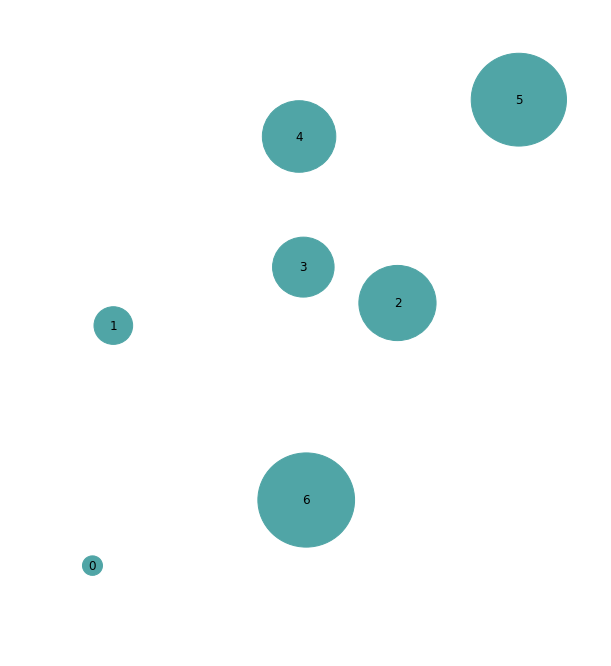

In [73]:
plot_markov_model(cgrm, minflux=1e-05, 
                  state_colors='#50A5A6');

In [74]:
pos = [[3,0],[2,3],[-3,-3],[0,0],[-3,3],[-6,0],[2,-4]]
pos = np.array(pos)
state_labels = [f'MS{i}' for i in range(1,8)]

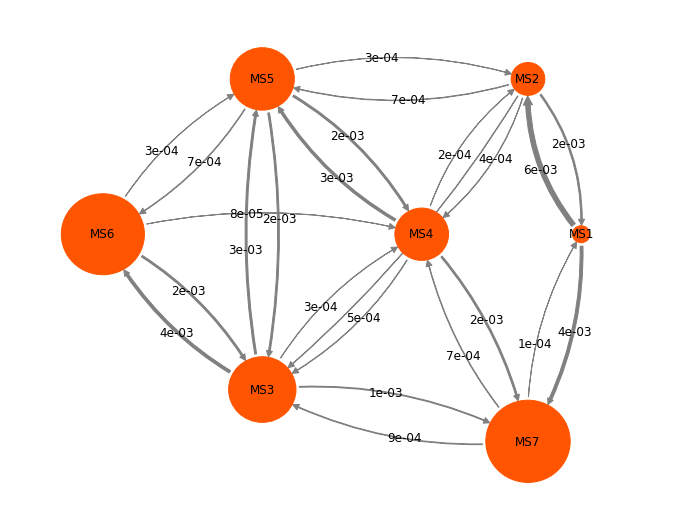

In [75]:
mplt.plot_markov_model(cgrm, pos=pos, minflux=1e-05, state_labels=state_labels);

In [100]:

def mfpt2kon(mfpt):
    mfpt *= 1e-9  # in seconds
    # volume fraction
    Nsim = 10173.0  # number of water molecules in our simulation
    Nstd = 55.55  # number of water molecules in standard volume
    concentration = Nstd / Nsim
    return 1./(mfpt*concentration)


def mfpt2koff(mfpt):
    mfpt *= 1e-9  # in seconds
    k_off = 1./mfpt
    return k_off


In [101]:
pos = np.array([[2.0,-1.5],[1,0],[2.0,1.5],[0.0,-1.5],[0.0,1.5]])

### MFPT calculation

In [240]:
def get_multi_metasets(meta_list, meta_sets):
    multi_metasets = np.array([], dtype=np.int32)
    for i in meta_list:
        multi_metasets = np.append(multi_metasets, meta_sets[i-1])
    return multi_metasets

In [253]:
#A,B no need to minus 1
A = get_multi_metasets([1,2,3,5,6], M.metastable_sets)
B = get_multi_metasets([4,7], M.metastable_sets)
t = M.mfpt(A,B)
print('Time = {:.2f} us'.format(msm_lag*dt*t/1000))

Time = 3.51 us


### Gibbs free energy

In [263]:
bayesian_msm = msm.bayesian_markov_model(dtrajs, msm_lag)


In [ ]:
M_P_bayesian = bayesian_msm.pcca(n_sets)

In [ ]:
open_closed_sets = [A, B]

In [332]:
pi_pcca_sample = np.zeros((2, bayesian_msm.nsamples))

pi_sample = bayesian_msm.sample_f('pi')

for j in range(bayesian_msm.nsamples):
    for i, s in enumerate(open_closed_sets):
        pi_pcca_sample[i, j] = pi_sample[j][s].sum()

(0.4615654551445199, 0.6369521858966897)
(0.3639904687889511, 0.5384568453213365)


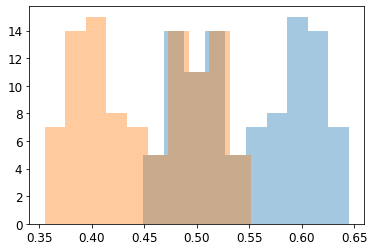

In [337]:
## plot
fig, ax = plt.subplots()
AB_confidence_interval = []
for i in range(2):
    ax.hist(pi_pcca_sample[i], alpha=.4)
    # confidence intervals
    print(pyemma.util.statistics.confidence_interval(pi_pcca_sample[i]))
    AB_confidence_interval.append(pyemma.util.statistics.confidence_interval(pi_pcca_sample[i]))

In [362]:
pi_PHE415_closed = M.pi[A].sum()
pi_PHE415_open = M.pi[B].sum()
print(f'closed: {pi_PHE415_closed}')
print(f'open: {pi_PHE415_open}')
print(f"Gibbs free energy of PHE415 flip: {-8.314*298.15*np.log(pi_PHE415_open/pi_PHE415_closed)}")

closed: 0.5708581460703412
open: 0.4291418539296591
Gibbs free energy of PHE415 flip: 707.339016890386


In [369]:
pi_pcca_sample[0].mean()

0.5495018522638145

In [370]:
pi_pcca_sample[1].mean()

0.4504981477361855

In [371]:
-8.314*298.15*np.log(pi_pcca_sample[1].mean()/pi_pcca_sample[0].mean())

492.43768894297915

In [363]:
def deltaG_error(x_open,x_error, y_closed, y_error):
    error = ((-8.314*298.15*x_error/x_open)**2+(8.314*298.15*y_error/y_closed)**2)**0.5
    return error

In [378]:

x_open = pi_PHE415_open.copy()

x_error = get_std_AB(pi_std[B])

y_closed = pi_PHE415_closed.copy()
y_error = get_std_AB(pi_std[A])

print(x_open)
print(x_error)
print(y_closed)
print(y_error)


0.4291418539296591
0.02563711359707571
0.5708581460703412
0.0265964720085939


In [379]:
deltaG_error(x_open,x_error,y_closed,y_error)

187.79532157328296

In [373]:
pi_std = bayesian_msm.sample_std('pi')

In [375]:
def get_std_AB(pi_std_AB):
    a = 0
    for i in pi_std_AB:
        a += i**2
    return a**0.5

In [376]:
get_std_AB(pi_std[A])

0.0265964720085939

In [377]:
get_std_AB(pi_std[B])

0.02563711359707571

### TPT analysis

In [104]:
M_P.coarse_grained_stationary_probability

array([0.01366614, 0.05215076, 0.16065897, 0.11247686, 0.14727789,
       0.22046471, 0.29330466])

In [113]:
for i, s in enumerate(M.metastable_sets):
    print(f'pi_{i+1}:{M.pi[s].sum()}')

pi_1:0.01567982244500061
pi_2:0.04663252906296047
pi_3:0.08665023155732593
pi_4:0.09000565201205453
pi_5:0.18482705247311265
pi_6:0.2370685105319415
pi_7:0.3391362019176046


In [121]:
cgrm_model = msm.markov_model(cgrm)

In [125]:
cgrm

array([[9.89691085e-01, 5.97669705e-03, 5.32461136e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 3.79975637e-03],
       [1.92860477e-03, 9.96499280e-01, 4.93102385e-04, 4.24644963e-04,
        6.54367844e-04, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.98100759e-05, 9.92463629e-01, 2.54582801e-04,
        2.51168737e-03, 3.61916942e-03, 1.13112099e-03],
       [0.00000000e+00, 1.69512691e-04, 4.56631776e-04, 9.93928425e-01,
        3.22638357e-03, 0.00000000e+00, 2.21904681e-03],
       [0.00000000e+00, 2.72218348e-04, 2.27294977e-03, 2.48817388e-03,
        9.94257904e-01, 7.08754106e-04, 0.00000000e+00],
       [0.00000000e+00, 3.04780911e-05, 2.33864782e-03, 8.40531171e-05,
        3.11768360e-04, 9.97201757e-01, 3.32952701e-05],
       [1.33043741e-04, 3.54917736e-05, 9.34545411e-04, 7.11177086e-04,
        0.00000000e+00, 0.00000000e+00, 9.98185742e-01]])

In [183]:
A = np.array([5])
B = np.array([7])
tpt = msm.tpt(cgrm_model, A-1, B-1)

(<Figure size 864x672 with 1 Axes>,
 array([[ 3,  0],
        [ 2,  3],
        [-3, -3],
        [ 0,  0],
        [-3,  3],
        [-6,  0],
        [ 2, -4]]))

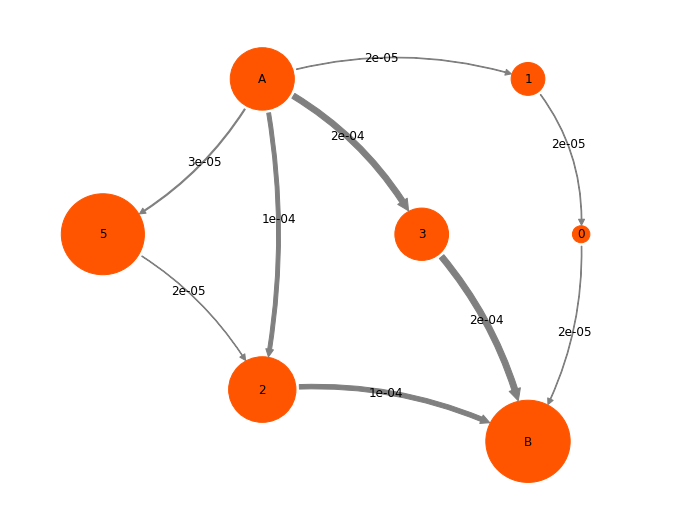

In [184]:
mplt.plot_flux(tpt, pos=pos, attribute_to_plot='net_flux',show_committor=False,
              state_scale=1, arrow_scale=1.3, minflux=1e-5 )

### Extra frame index for each conformation

In [78]:
M.metastable_sets

[array([ 7, 21, 32]),
 array([ 3, 17, 31, 35, 78, 89, 90]),
 array([ 5, 16, 24, 30, 39, 40, 62, 65, 75, 96, 99]),
 array([ 4, 28, 34, 53]),
 array([ 1,  6, 12, 14, 23, 27, 29, 37, 42, 46, 47, 51, 64, 66, 68, 69, 72,
        76, 79, 84, 85, 93]),
 array([ 2,  8,  9, 10, 15, 18, 25, 26, 38, 41, 44, 45, 48, 49, 50, 52, 54,
        63, 70, 71, 74, 77, 80, 81, 82, 87, 88, 91, 94]),
 array([ 0, 11, 13, 19, 20, 22, 33, 36, 43, 55, 56, 57, 58, 59, 60, 61, 67,
        73, 83, 86, 92, 95, 97, 98])]

In [147]:
import pandas as pd

In [197]:
def get_pcca_i_frame_index(pcca_i):
    df = pd.DataFrame()
    for traj_index in range(60):
        pcca_i_frame_index = np.array([])
        for i in M.metastable_sets[pcca_i]:
            pcca_i_frame_index = np.append(pcca_i_frame_index, np.where(M.discrete_trajectories_active[traj_index]==i))
        pcca_i_frame_index = np.sort(pcca_i_frame_index).astype('int32')
        df_i = pd.DataFrame(pcca_i_frame_index, columns=[traj_index+1])
        df = pd.merge(df, df_i, right_index=True,left_index=True,how='outer')
    df.to_csv(f'./pcca_frame_index/pcca_{pcca_i+1}_frame_index.csv',index_label=False)
    print(f'pcca_{pcca_i+1} finished!')

In [198]:
get_pcca_i_frame_index(2)

pcca_3 finished!


In [199]:
%mkdir pcca_frame_index
for i in range(7):
    get_pcca_i_frame_index(i)

mkdir: pcca_frame_index: File exists
pcca_1 finished!
pcca_2 finished!
pcca_3 finished!
pcca_4 finished!
pcca_5 finished!
pcca_6 finished!
pcca_7 finished!


In [190]:
%mkdir 

usage: mkdir [-pv] [-m mode] directory ...


In [ ]:
for i in 

In [61]:
for i in M.discrete_trajectories_active:
    print(len(i))

10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
10001
5001
5001
5001
5001
5001
5001
5001
5001
5001
10001
5001
5001
5001
5001
5001
5001
5001
5001
5001
5001
10001
5001
5001
5001
5001
5001
5001
5001
5001
5001
5001
10001
5001
20001
20001
20001
20001
20001
20001
20001
20001
20001
10001
20001
10001
10001
10001
10001


### Extra each conformation

In [54]:
import mdtraj as md

In [55]:
M_P.metastable_sets

[array([ 7, 21, 32]),
 array([ 3, 17, 31, 35, 78, 89, 90]),
 array([ 5, 16, 24, 30, 39, 40, 62, 65, 75, 96, 99]),
 array([ 4, 28, 34, 53]),
 array([ 1,  6, 12, 14, 23, 27, 29, 37, 42, 46, 47, 51, 64, 66, 68, 69, 72,
        76, 79, 84, 85, 93]),
 array([ 2,  8,  9, 10, 15, 18, 25, 26, 38, 41, 44, 45, 48, 49, 50, 52, 54,
        63, 70, 71, 74, 77, 80, 81, 82, 87, 88, 91, 94]),
 array([ 0, 11, 13, 19, 20, 22, 33, 36, 43, 55, 56, 57, 58, 59, 60, 61, 67,
        73, 83, 86, 92, 95, 97, 98])]

In [56]:
def frame_index(k_clusters, traj):
    '''
    k_clusters is a set of the k means cluster index corresponding to a specific macro state
    obtained from the PCCA algorithm
    '''
    index = []
    for i,v in enumerate(traj):
        if v in k_clusters:
            index.append(i)
    return index

In [70]:
def macro_xtc(macro_name, dtrajs, macro_state_sets, traj_list):
    traj = md.load('../01_fix-MD/structure.gro')
    for i,dtraj in enumerate(dtrajs):
        #print(i)
        t_origin = md.load(traj_list[i], top='../01_fix-MD/structure.gro')
        index = frame_index(M_P.metastable_sets[macro_dict[macro_name]], dtraj)
        traj = traj + t_origin[index][::5]
       # if len(traj[1:]) > 5000:
           # break
    print(len(traj[1:]))
    traj[1:].save(f'./MHETase/{macro_name}.xtc')

In [71]:
macro_dict = {'MHETase-PCCA1':0, 'MHETase-PCCA2':1,'MHETase-PCCA3':2,'MHETase-PCCA4':3, \
              'MHETase-PCCA5':4,'MHETase-PCCA6':5, 'MHETase-PCCA7':6}

In [74]:
for i in range(1,8):
    macro_xtc(f'MHETase-PCCA{i}', dtrajs, M_P.metastable_sets, traj_list)

1593
3283
6462
10238
16521
15371
56614


In [75]:
7948+16405+32279+51072+82552+76831

267087

In [76]:
all_len = 0
for dtraj in dtrajs:
    all_len += len(dtraj)

In [77]:
all_len  

550060

### if productive

In [78]:
M_P.coarse_grained_stationary_probability

array([0.01366614, 0.05215076, 0.16065897, 0.11247686, 0.14727789,
       0.22046471, 0.29330466])

In [79]:
feat1 = coor.featurizer(topfile)


In [80]:
pro_groups = []
pro_groups.append(feat1.select('index 4642'))
pro_groups.append(feat1.select('resid 223 104 188 39 105'))


#pro_groups.append(feat1.select('index 1529 546 1525'))

In [81]:
pro_groups

[array([4642]),
 array([ 550,  551,  552,  553,  554,  555,  556,  557,  558,  559,  560,
         561,  562,  563, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479,
        1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490,
        1491, 1492, 1493, 1494, 1495, 2663, 2664, 2665, 2666, 2667, 2668,
        2669, 3169, 3170, 3171, 3172, 3173, 3174, 3175, 3176, 3177, 3178,
        3179, 3180, 3181, 3182, 3183, 3184, 3185])]

In [82]:
pro_pairs = np.array([[0,1]])

In [110]:
len(pro_pairs)

1

In [83]:
len(pro_groups)

2

In [84]:
ref='../01_fix-MD/reference.xtc'
#for ri in key_reside:
#    feat.add_backbone_torsions(selstr='residue %i'%ri, cossin=True)
#for ri in range(2,317):
#    feat.add_backbone_torsions(selstr='residue %i and backbone' %ri, cossin=True, periodic=True)
#for ri in range(137,149):
#    feat.add_backbone_torsions(selstr='residue %i'%ri, cossin=True)
#feat.add_residue_mindist(residue_pairs=ind_arr, scheme='closest-heavy',threshold=1, periodic=True)
#feat.add_angles(ang_pair, deg=False, cossin=True, periodic=True)
feat1.add_sidechain_torsions(selstr=f'residue {415}',which='all', deg=True)
#feat.add_distances(dis_pair, periodic=True)
#feat.add_contacts(indices=_VR6_atom, indices2=cata_center_atom, threshold=0.3, periodic=True)#
#feat.add_backbone_torsions(selstr=None, deg=True, cossin=False, periodic=True)
#feat.add_residue_COM(range(317))
#feat.add_minrmsd_to_ref(ref, ref_frame=0, atom_indices=None, precentered=False)
#feat1.add_group_mindist(group_definitions=pro_groups, group_pairs=pro_pairs, periodic=True)


/Users/chenlin/opt/anaconda3/envs/pyemma254/lib/python3.6/site-packages/mdtraj/geometry/dihedral.py:374: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  indices = np.vstack(x for x in indices if x.size)[id_sort]
/Users/chenlin/opt/anaconda3/envs/pyemma254/lib/python3.6/site-packages/pyemma/coordinates/data/featurization/angles.py:211: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  indices = np.vstack(valid.values())


In [85]:
feat1.describe()

['CHI1 0 PHE 415', 'CHI2 0 PHE 415']

In [86]:
inp1 = coor.source(traj_list, feat1)
inp1.dimension()

2

In [87]:
pro_dtraj = inp1.get_output()

In [88]:
def macro_feat(macro_name, dtrajs,pro_dtraj, macro_state_sets, traj_list):
    meta_feat = []
    for i,dtraj in enumerate(dtrajs):
        index = frame_index(M_P.metastable_sets[macro_dict[macro_name]], dtraj)
        for j in index:
            meta_feat.append(pro_dtraj[i][j])
    return meta_feat

In [89]:
len(pro_dtraj[1])

10001

In [90]:
def macro_hist(a):
    b = []
    c = []
    counts = 0
    for ii in a:
        b.append(ii[0])
        c.append(ii[1])
    plt.hist(b)
    plt.hist(c)

In [91]:
macro_dict = {'MHETase-PCCA1':0, 'MHETase-PCCA2':1,'MHETase-PCCA3':2,'MHETase-PCCA4':3, \
              'MHETase-PCCA5':4,'MHETase-PCCA6':5, 'MHETase-PCCA7':6}

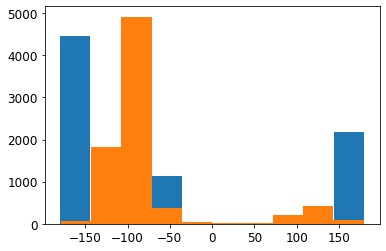

In [92]:
a = macro_feat('MHETase-PCCA1', dtrajs,pro_dtraj, M_P.metastable_sets, traj_list)
macro_hist(a)

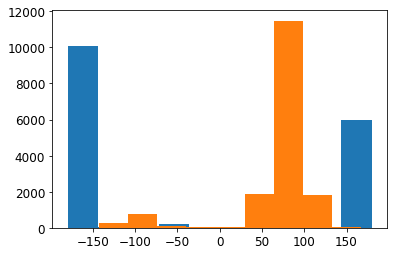

In [93]:
a = macro_feat('MHETase-PCCA2', dtrajs,pro_dtraj, M_P.metastable_sets, traj_list)
macro_hist(a)

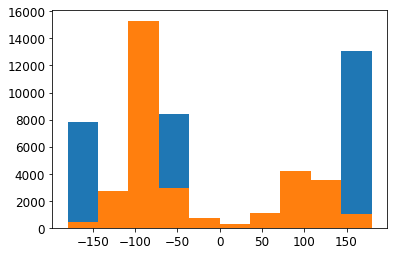

In [94]:
a = macro_feat('MHETase-PCCA3', dtrajs,pro_dtraj, M_P.metastable_sets, traj_list)
macro_hist(a)

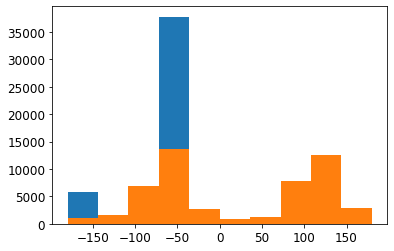

In [95]:
a = macro_feat('MHETase-PCCA4', dtrajs,pro_dtraj, M_P.metastable_sets, traj_list)
macro_hist(a)

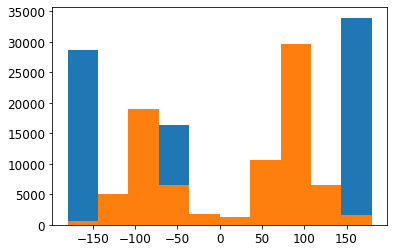

In [96]:
a = macro_feat('MHETase-PCCA5', dtrajs,pro_dtraj, M_P.metastable_sets, traj_list)
macro_hist(a)

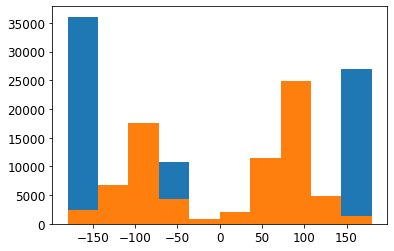

In [97]:
a = macro_feat('MHETase-PCCA6', dtrajs,pro_dtraj, M_P.metastable_sets, traj_list)
macro_hist(a)

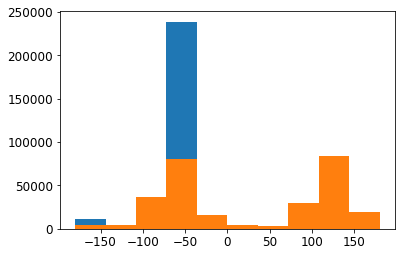

In [98]:
a = macro_feat('MHETase-PCCA7', dtrajs,pro_dtraj, M_P.metastable_sets, traj_list)
macro_hist(a)